In [130]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Decision Tree Classification

In [131]:
data = pd.read_csv('exam.csv')
data.head(15)

,5me,guide,result
0,0,0,fail
1,1,1,pass
2,1,0,pass
3,0,0,fail
4,0,0,fail
5,1,1,pass
6,0,1,fail
7,1,1,pass
8,1,0,fail
9,1,1,pass


In [132]:
encode = LabelEncoder()
data['result']=encode.fit_transform(data.result)

In [133]:
data.head()

,5me,guide,result
0,0,0,0
1,1,1,1
2,1,0,1
3,0,0,0
4,0,0,0


In [134]:
data.rename(columns={'5me':'Utube'},inplace=True)
data.head()

,Utube,guide,result
0,0,0,0
1,1,1,1
2,1,0,1
3,0,0,0
4,0,0,0


In [135]:
x=data.drop(['result'],axis='columns')
y=data.result

In [136]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=6)

In [137]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [138]:
model.score(x_test,y_test)

0.75

In [139]:
pred = model.predict(x_test)

In [140]:
matrix = confusion_matrix(pred,y_test)
matrix

array([[1, 0],
       [1, 2]])

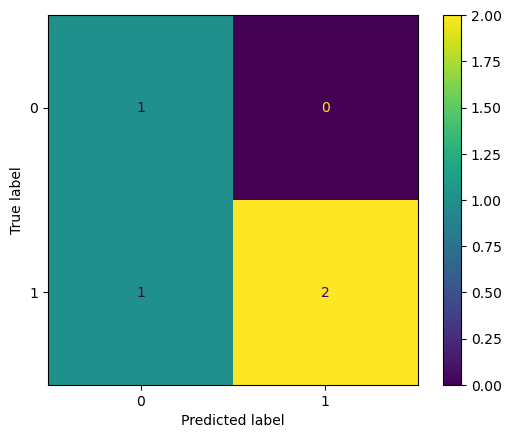

In [141]:
visual = ConfusionMatrixDisplay(confusion_matrix=matrix)
visual.plot()
plt.show()

In [144]:
export_graphviz(model,'dt.tree',feature_names=['Utube','guide'])

# Decision Tree Regression

In [175]:
data = pd.read_csv('exam1.csv')
data.head(5)

,5me,guide,result
0,0,0,30
1,1,1,89
2,1,0,55
3,0,0,31
4,0,0,32


In [176]:
x=data.drop(['result'],axis='columns')
y=data['result']

In [177]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [178]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [180]:
model.score(x,y)

0.8596407076209728

In [183]:
pred = model.predict(x)

In [184]:
export_graphviz(model,'dt_reg.tree',feature_names=['5me','guide'])